#Batch GD vs Stochastic GD vs Mini Batch GD

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression

In [2]:
# Create dataset

x, y = make_regression(n_samples = 10000, n_features = 20, n_informative = 20, noise = 10, random_state = 1)

#Normalize dataset

u = np.mean(x, axis = 0)
std = np.std(x, axis = 0)
x = (x - u)/std

In [3]:
#Add a column of ones for vectorisation

ones = np.ones((x.shape[0], 1))
x = np.hstack((ones, x))
print(x.shape)
print(y.shape)

(10000, 21)
(10000,)


#Linear Regression

In [4]:
def hypothesis(x,theta):
    return np.dot(x,theta)

In [5]:
def error(x,y,theta):
    m = x.shape[0]
    e = 0.0
    y_ = hypothesis(x,theta)
    e = np.sum((y-y_)**2)
    
    return e/m

In [6]:
def gradient(x,y,theta):
    
    y_ = hypothesis(x,theta)
    grad = np.dot(x.T,(y_ - y))
    m = x.shape[0]
    return grad/m

Batch GD => Compute the gradient w.r.t entire dataset

In [7]:
def gradientDescent(x,y,learningRate = 0.1,maxIters=300):
    
    n = x.shape[1]
    theta = np.zeros((n,))
    errorList = []
    
    for i in range(maxIters):
        e = error(x,y,theta)
        errorList.append(e)
        
        #Gradient descent
        grad = gradient(x,y,theta)
        theta = theta - learningRate*grad
        
    return theta,errorList

In [8]:
import time
start = time.time()
theta, errorList = gradientDescent(x, y)
end = time.time()
print('Time taken: ', end - start)

Time taken:  0.23685264587402344


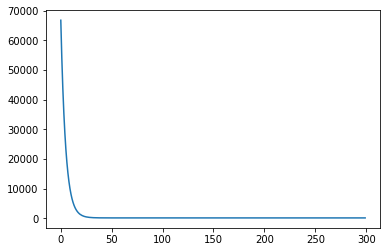

In [9]:
plt.plot(errorList)
plt.show()

Mini Batch GD => Compute the gradient w.r.t some part of the dataset

In [10]:
def batchGradientDescent(x, y, batchSize = 20, learningRate = 0.1, maxIters=100):
    
    n = x.shape[1]
    theta = np.zeros((n,))
    errorList = []
    
    data = np.hstack((x, y.reshape(-1, 1)))

    for i in range(maxIters):
        # Mini Batch Gradient descent
        np.random.shuffle(data)
        m = data.shape[0]
        totalBatches = m // batchSize

        for j in range(totalBatches):
            batchData = data[j*batchSize : (j+1)*batchSize, : ]
            xBatch = batchData[:, :-1]
            yBatch = batchData[:, -1]
            batchGrad = gradient(xBatch,yBatch,theta)
            theta = theta - learningRate*batchGrad

            e = error(x,y,theta)
            errorList.append(e)

    return theta,errorList

In [11]:
start = time.time()
theta, errorList = batchGradientDescent(x, y)
end = time.time()
print('Time taken: ', end - start)

Time taken:  20.88623285293579


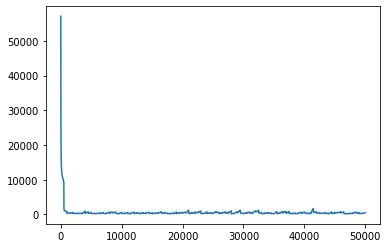

In [12]:
plt.plot(errorList)
plt.show()

In [13]:
start = time.time()
theta, errorList = batchGradientDescent(x, y, batchSize=200)
end = time.time()
print('Time taken: ', end - start)

Time taken:  4.049687623977661


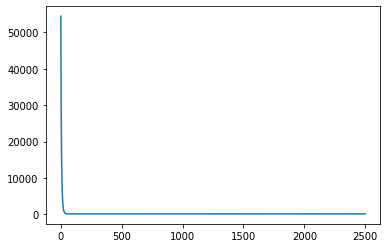

In [14]:
plt.plot(errorList)
plt.show()

#Some points to remember:

Stochastic GD and Batch GD are special cases of the Mini Batch GD.

In Stochastic GD batch size if 1. And in Batch GD batch size is complete dataset.

In batch GD number of updates in theta are very less as compared to others. Vectorisation is not possible in Stochastic GD. So better method is Mnin Batch GD.

In Mini Batch GD and Stochastic GD theta updates frequently but noisy updates are there.